# Mini-paperwork - Informetis Europe LTD
Welcome to this mini-paperwork!<br><br>
Here we would like to test your abilities using Pandas and your Data Scientits' knowledge. Please, read through this notebook and complete the code whenever you find the following structure: 
```python 
## START CODE HERE (2 lines) ##
variable = None
None
## END CODE HERE
```
You should replace **None** with the correct code. Number of estimated lines are also indicated.

__Importing the libraries:__

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Data Manipulation with Pandas:   

In this excercise, we would like to test your skills manipulating data with _Pandas_.

We provide a small dataset (*datafile*) that contains the total power consumption and the appliance power consumption for a household during one month. In this CSV columns are: 
    - 'datetime': pandas datetimeIndex with minute resolution. 
    - 0: Total consumption
    - 9:Kettle
    - 20:Microwave
    - 35:Oven
Your DataFrame should look like this: 

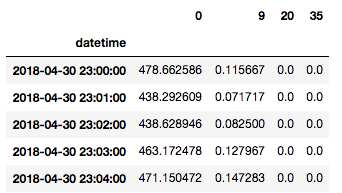

In [4]:
from IPython.display import Image
Image('/Users/carlatroyas/Documents/Informetis/minipaperwork_data_scientist/img/dataframe.png')

__You should complete the following steps: __
1. Read the dataset using pandas. You should indicate as arguments that the first column is index and it should be parse as dates.
2. Create an Energy Report following the indicated steps. 
3. Obtain the power histogram for appliances.

### 1.1 Load the data

In [5]:
# The dataset file:
datafile = '/Users/carlatroyas/Documents/Informetis/minipaperwork_data_scientist/power_data.csv'

## START CODE HERE (1 line) ## 
df = pd.read_csv(datafile, index_col=0, parse_dates=['datetime'])
## END CODE HERE ##

df.columns = df.columns.astype('int')

print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,0,9,20,35
datetime,,,,
2018-04-30 23:00:00,478.662586,0.115667,0.0,0.0
2018-04-30 23:01:00,438.292609,0.071717,0.0,0.0
2018-04-30 23:02:00,438.628946,0.082500,0.0,0.0
2018-04-30 23:03:00,463.172478,0.127967,0.0,0.0
2018-04-30 23:04:00,471.150472,0.147283,0.0,0.0


In [6]:
print(df.columns)

Int64Index([0, 9, 20, 35], dtype='int64')


### 1.2 Energy Report

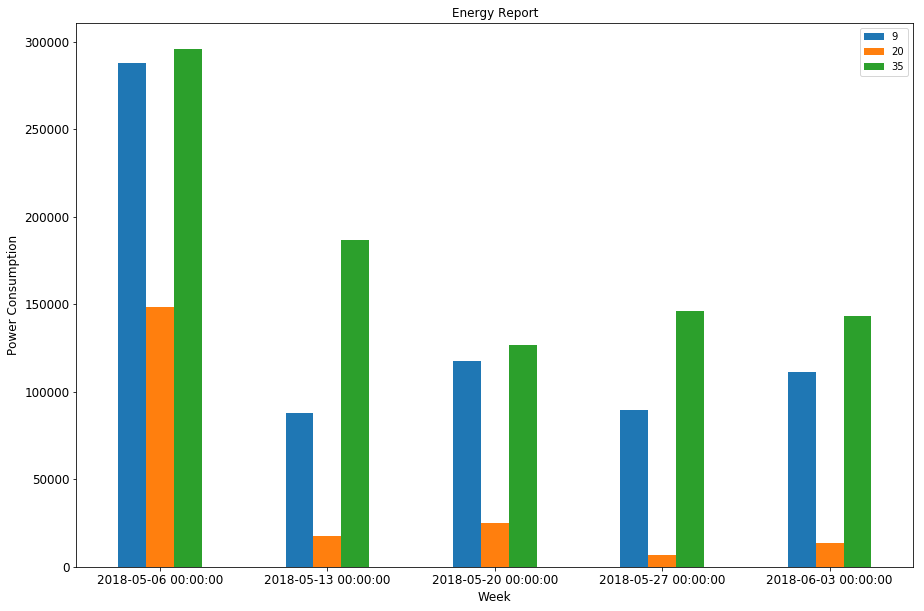

In [8]:
## START CODE HERE (3 lines) ## 

# Drop the total consumption from the dataframe (we only want the report for appliances)
energy_report = df.drop(0, axis=1)

# Resample the DataFrame to 1 week and use 'sum' to aggregated the values
energy_report=energy_report.resample('W', label='right').sum()

# Use plot bar method in the dataframe to show the report 
ax = energy_report[[9,20, 35]].plot(kind='bar', title ="Energy Report", figsize=(15, 10), legend=True, fontsize=12, rot=0)
ax.set_xlabel("Week", fontsize=12); ax.set_ylabel("Power Consumption", fontsize=12)

## END CODE HERE ## 

You should expect a graph like this one: 

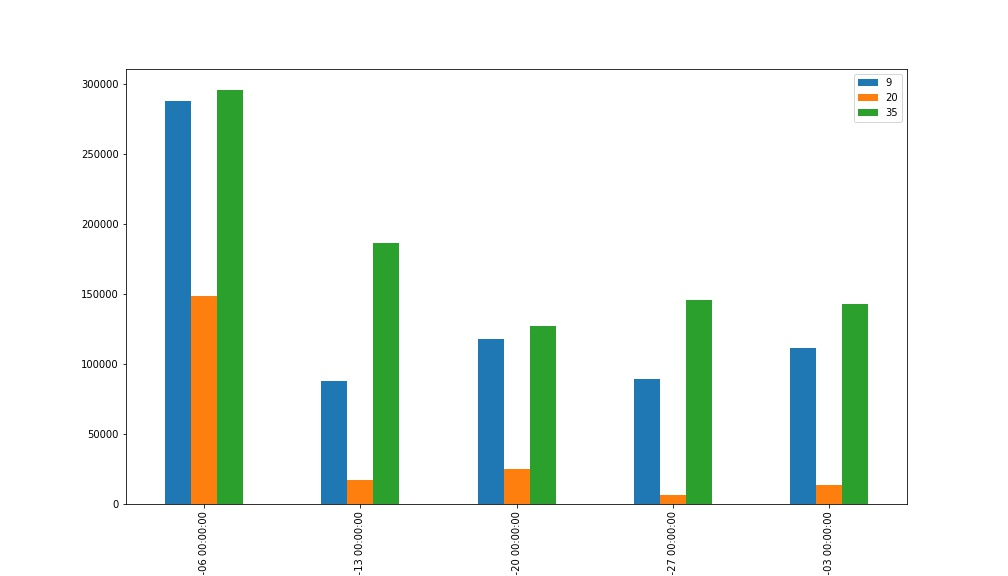

In [13]:
from IPython.display import Image
Image('img/energy_report.jpg')

### 1.3 Power Histogram

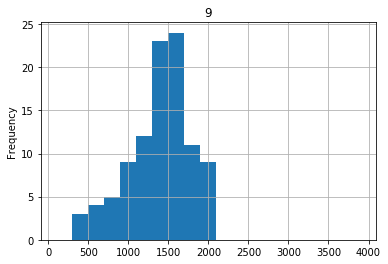

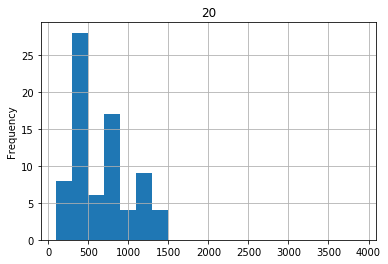

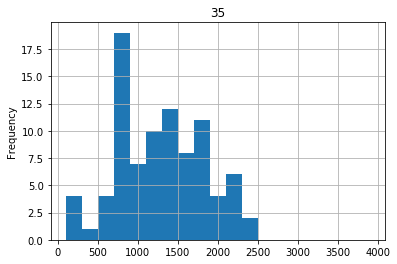

In [14]:
th = 100
bins = np.arange(th, 4000, 2*th)
power_hist= df.copy()
power_hist = power_hist.drop(0, axis=1)


## START CODE HERE (4 lines) ##
# Cleaning the data: Replace NaN values with 0. 
power_hist = power_hist.fillna(0)

# Apply the threshold 'th' to remove small values from the data. 
power_hist[power_hist < th] = 0

# Resample the data to 5 minutes using as aggregated function the 'mean'
power_hist = power_hist.replace(0, np.NaN) #required for mean calculation excluding zeros
power=power_hist.resample('5Min').mean()

#power.to_csv('5minout.csv')
#print(power[power > 1500].count())

#Use 'plot.hist' method to plot the histogram.

power[9].plot.hist(by=None, bins=bins, title=9, grid=True, legend=False)
plt.show()
power[20].plot.hist(by=None, bins=bins, title=20, grid=True, legend=False)
plt.show()
power[35].plot.hist(by=None, bins=bins, title=35, grid=True, legend=False)
plt.show()

#power.plot.hist(bins=bins, grid=True, subplots=True, title=[9, 20, 35])

You should expect a graph like this one: 

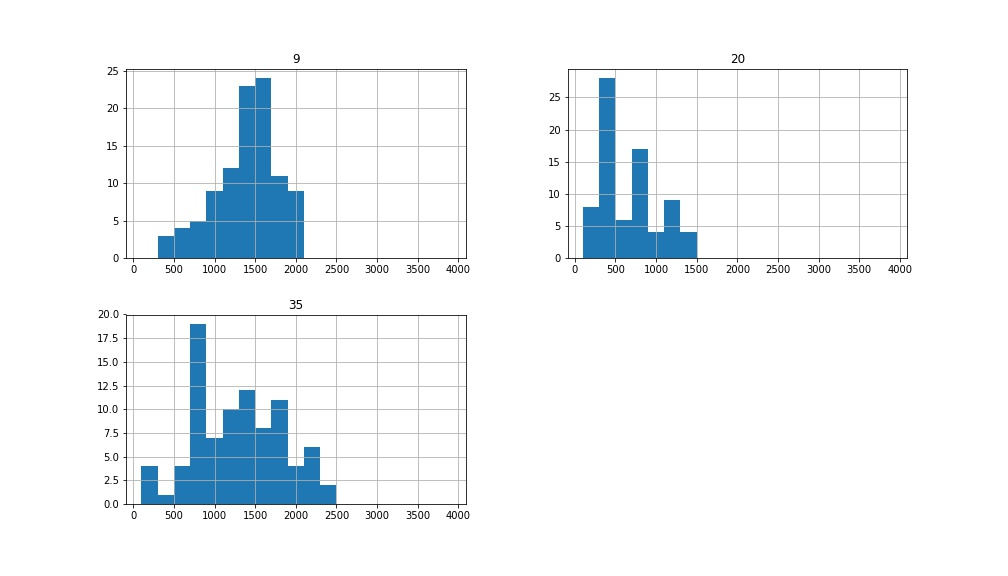

In [271]:
from IPython.display import Image
Image('img/power_hist.jpg')

## 2. Anomaly Detection:   

Anomaly detection methods are a particular domain inside the Machine Learning domain where we try to detect Outliers in the data (i.e. samples that do not follow the data distribution). There are different scenearios: 

- Data is unlabelled and therefore we have to use unsupervised methods.
- Data is labelled but there are just a few anomaly examples to model them as a class. Thus we try to model the _normal behavior_
- We have a few labels and therefore we can use semi-supervised methods. 

In the following excercise we provide a small dataset for the Kettle with one single feature: the time of inactivity (i.e. the running time since we have seen the last connection for this appliance.)

The data is labelled and can be seen in the following graph: 

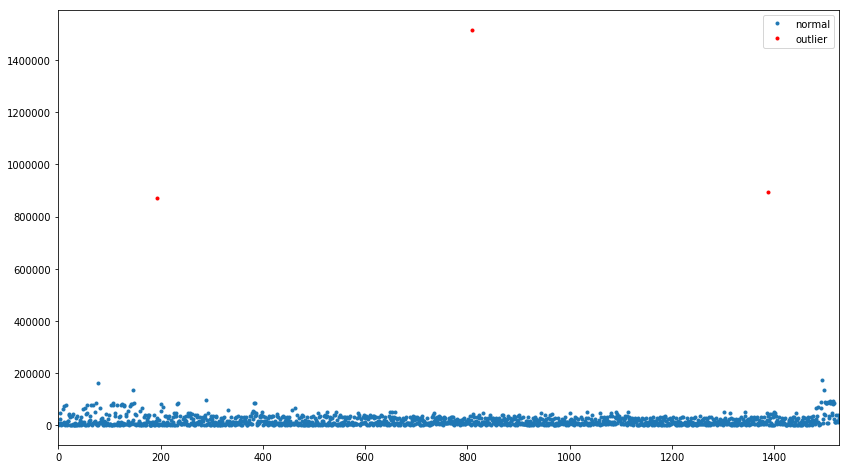

In [15]:
events = pd.read_csv('events.csv', index_col=0)

fig, ax = plt.subplots(figsize=(14,8))
events[events.anomaly==0].inactivity.plot(style='.', ax=ax)
events[events.anomaly==1].inactivity.plot(style='.', ax=ax, color='r')
plt.legend(['normal', 'outlier'])

Your task in this excercise is to come up with an Anomaly Detector algorithm that help us to detect those cases where the Kettle has not been used for a long time. This is a very important feature for Assisted Living applications. 

Ideally this will be an unsupervised method. However, you can also come up with another supervised method as the dataset is labelled. 

__In this excercise we do not require to write any code. You can simply explain your approach in the following cells. However, any attempt to code the algorithm will be positively considered__

### Your approach: 



Please, look at second notebook with the title __"Anomaly Detection Algorithms"__



In [16]:
## START CODE HERE (undefined number of lines) ##
data=pd.DataFrame(events)
data.describe()

## END CODE HERE ##

,inactivity,anomaly
count,1.528000e+03,1528.000000
mean,1.897672e+04,0.001963
std,5.278012e+04,0.044281
min,5.980000e+02,0.000000
25%,4.186000e+03,0.000000
50%,1.031550e+04,0.000000
75%,2.601300e+04,0.000000
max,1.516827e+06,1.000000
